In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# 과제 001

주어진 함수를 이용하여 gradient descent 를 직접 구현하고 그래프를 그리시오.


**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (23/7/6까지)

```
def f(x):
    return x**4 - 3*x**3 +2

def fprime(x):
    h = 0.001
    return (f(x+h) - f(x))/h
```

* 힌트: 교과서 44p를 **참고**

Text(0, 0.5, '$y=x^4-3x^3+2$')

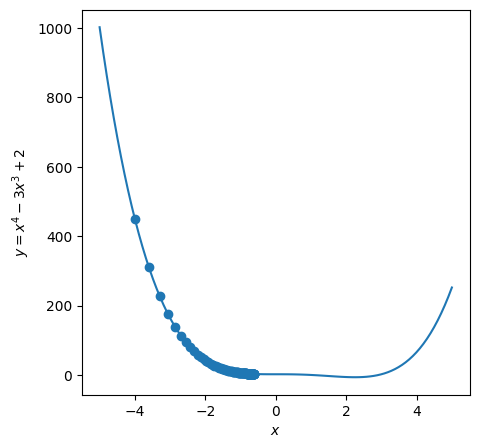

In [3]:
def f(x):
  return x**4 - 3*x**3 + 2

def fprime(x):
  h = 0.001
  return (f(x+h)-f(x))/h

all_x = tf.linspace(-5,5,100)
all_y = f(all_x)

x = tf.Variable(-4.) # 초기값 : x = -4
LR = 0.001

x_history, y_history = [], []
for _ in range(100):
  y = f(x)
  step = LR*fprime(x)

  x_history.append(x.numpy())
  y_history.append(y.numpy())

  x.assign_sub(step)  # x = x - lr*dx => 최소점을 향해 가기

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(all_x, all_y)
ax.scatter(x_history, y_history)
plt.xlabel('$x$')
plt.ylabel('$y=x^4-3x^3+2$')

# 과제 002

주어진 보스톤 주택 가격 데이터 셋을 이용하여 주택 가격을 예측하는 multiple variables regression 을 수행하는 프로그램을 직접 작성하시오.

단, 아래 조건을 만족하여 구현하시오.

* loss 함수: tensorflow 의 MSE
* gradient 계산: tensorflow의 GradientTape()
* optimizer: tensorflow의 Adam

**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (23/7/6까지)

```python
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data
# features 설명 (http://lib.stat.cmu.edu/datasets/boston)
# 보스톤 주택 가격(MEDV) 예측 (1인당 범죄율, 주택당 평균 방 개수, 학생대 교사 비율 등의 features 이용함)
# MEDV(주택 가격 중앙값, 단위: $1,000)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)

all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
df.head()
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')
```

* 힌트:
https://dschloe.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/

In [5]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.engine.training import optimizer

# 학습 데이터
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

# print(len(train_X), len(test_X))
# print(train_X[0])
# print(train_Y[0])

# 학습 모델 불러오기
model  = Sequential()
model.add(Dense(1, input_shape = (train_X.shape[1],)))

# 최소제곱오차 및 adam 학습
model.compile(loss = 'mse', optimizer = 'adam')

# 100번 loop
model.fit(train_X, train_Y, epochs=100)
predictions = model.predict(test_X)
print(predictions)

# GradientTape() 적용
with tf.GradientTape() as tape:
    predictions = model(train_X)
    loss = tf.reduce_mean(tf.square(predictions - train_Y))

gradients = tape.gradient(loss, model.trainable_variables)
optimizer = tf.keras.optimizers.Adam()
optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 1593.0811
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 1037.2649
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 753.4434
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 641.9417
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 587.5412
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 535.8272
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 486.0879
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 440.5295
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 396.9417
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 359.2633
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 324.0765
Epoch 12/100
13/13 [==============================] - 0s 2ms/step - loss: 291.5510
Epoch 13/10

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>